In [47]:
!chmod +x isp.sh
!./isp.sh

ERROR: Could not find a version that satisfies the requirement wand-0.6.7 (from versions: none)
ERROR: No matching distribution found for wand-0.6.7
Finished installing requirements ...!
  The Tesseract OCR engine was one of the top 3 engines in the 1995
 UNLV Accuracy test. Between 1995 and 2006 it had little work done on
 it, but since then it has been improved extensively by Google and is
 probably one of the most accurate open source OCR engines
 available. It can read a wide variety of image formats and convert
 them to text in over 40 languages. This package includes the command
 line tool.
 More info: https://launchpad.net/~alex-p/+archive/ubuntu/tesseract-ocr
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRe

In [63]:
import os
import cv2
import pytesseract
import numpy as np
import pandas as pd
from PIL import Image
from wand.image import Image as wi
from google.colab.patches import cv2_imshow

In [49]:
path = r'./img' #source folder
dstpath = r'./gray_img' #destination folder

In [50]:
try:
  makedirs(dstpath)
except:
  print("Directory already exist, images will be written in same folder!")

Directory already exist, images will be written in same folder!


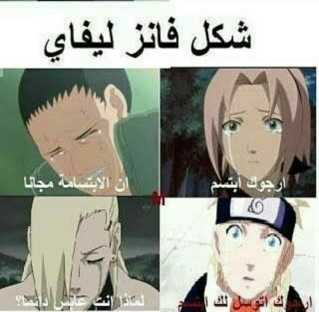

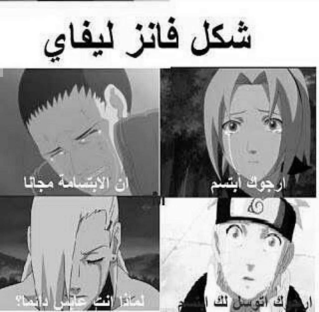

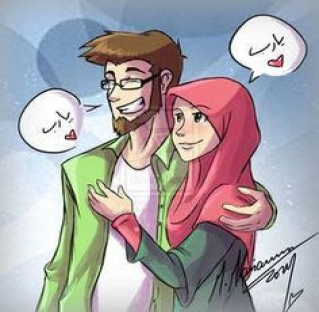

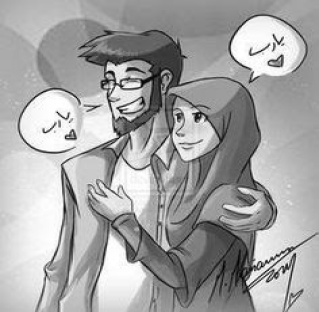

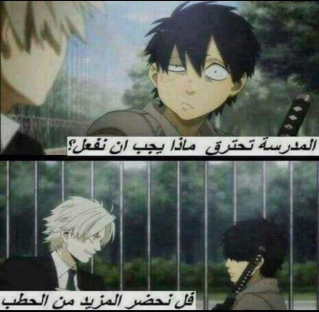

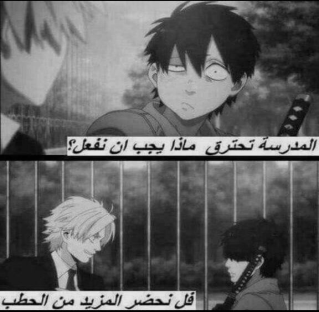

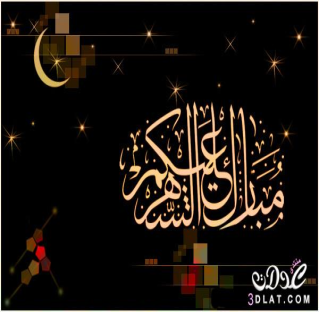

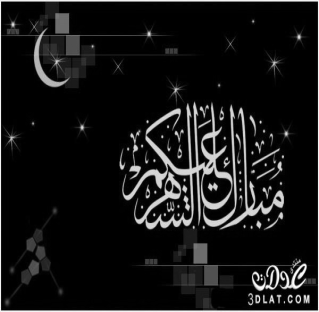

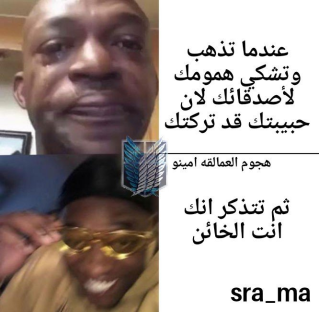

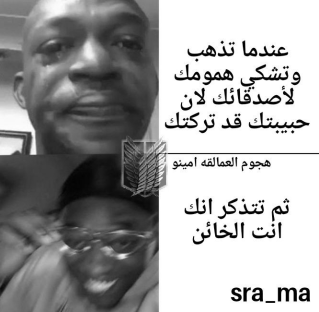

In [71]:
files = os.listdir(path)
scale_percent = 60 # percent of original size
w = int(img.shape[1] * scale_percent / 100)
h = int(img.shape[0] * scale_percent / 100)
dim = (w,h)

for image in files:
  img = cv2.imread(os.path.join(path,image))
  img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  cv2_imshow(img)
  print('\n')

  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  cv2_imshow(gray)
  print('\n')
  cv2.imwrite(os.path.join(dstpath, image),gray)

In [72]:
f = []
t = []
path_dir = r'./gray_img/'

In [73]:
for root, dirs, filenames in os.walk(path_dir):
  for filename in filenames:
    try:
      print(filename)
      f.append(filename)
      #print(f)
      img = Image.open(path_dir+ filename)
      text = pytesseract.image_to_string(img, lang = 'ara')
      t.append(text)
      #print(text)
      print('-='*20)
    except Exception as e:
      print(e)

3d04cb5fb1db781af83b32d295f1acc89da4.jpg
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
3dlat.net_30_17_e8b5_cbd9c93b01fd7.jpg
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
3e4b030bdf04e1369a14ac0730d0ec184076.jpg
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
3dlat.net_06_15_c2ac_66.jpg
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
3b356a9ee49b45216b9c9975f143fe67489d.jpg
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [74]:
df = pd.DataFrame(list(zip(f, t)),columns=['img','text'])
df.to_csv('cleaned_text.csv', index=False)

In [75]:
df.head()

,img,text
0,3d04cb5fb1db781af83b32d295f1acc89da4.jpg,\n
1,3dlat.net_30_17_e8b5_cbd9c93b01fd7.jpg,\n
2,3e4b030bdf04e1369a14ac0730d0ec184076.jpg,\n
3,3dlat.net_06_15_c2ac_66.jpg,\n\n \n\nلت\n\n \n\n \n\n \n
4,3b356a9ee49b45216b9c9975f143fe67489d.jpg,\n
